# GFS Data

This demonstrates how to access and plot GFS data. 

> Note: The product names are not as simple as the HRRR dataset, but we can still get GFS data.

In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc
from paint.standard2 import cm_tmp

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
H = Herbie("2021-07-11", model="gfs", product="pgrb2.0p25")

✅ Found ┊ model=gfs ┊ product=pgrb2.0p25 ┊ 2021-Jul-11 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [3]:
# Show all available sources
H.SOURCES

{'aws': 'https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'aws-old': 'https://noaa-gfs-bdp-pds.s3.amazonaws.com/gfs.20210711/00/gfs.t00z.pgrb2.0p25.f000',
 'ftpprd': 'https://ftpprd.ncep.noaa.gov/data/nccf/com/gfs/prod/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'nomads': 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'google': 'https://storage.googleapis.com/global-forecast-system/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000',
 'azure': 'https://noaagfs.blob.core.windows.net/gfs/gfs.20210711/00/atmos/gfs.t00z.pgrb2.0p25.f000'}

In [4]:
# Show all available products
H.PRODUCTS

{'pgrb2.0p25': 'common fields, 0.25 degree resolution',
 'pgrb2.0p50': 'common fields, 0.50 degree resolution',
 'pgrb2.1p00': 'common fields, 1.00 degree resolution',
 'pgrb2b.0p25': 'uncommon fields, 0.25 degree resolution',
 'pgrb2b.0p50': 'uncommon fields, 0.50 degree resolution',
 'pgrb2b.1p00': 'uncommon fields, 1.00 degree resolution',
 'pgrb2full.0p50': 'combined grids of 0.50 resolution'}

In [5]:
ds = H.xarray(":TMP:2 m above")

Text(0.0, 1.0, 'GFS: common fields, 0.25 degree resolution')

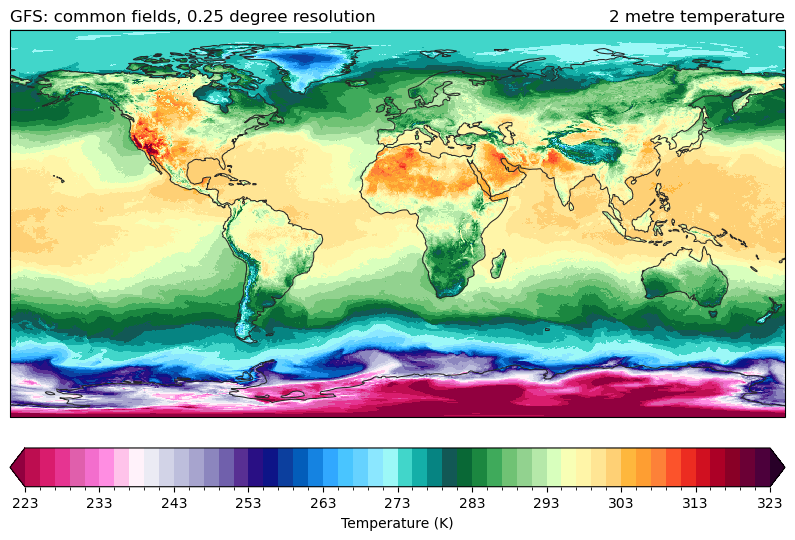

In [6]:
ax = EasyMap(crs=ds.herbie.crs, figsize=[10, 8]).ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **cm_tmp(units="K").cbar_kwargs
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")

Let's change it up and plot on a Geostationary projection.

Text(0.0, 1.0, 'GFS: common fields, 0.25 degree resolution')

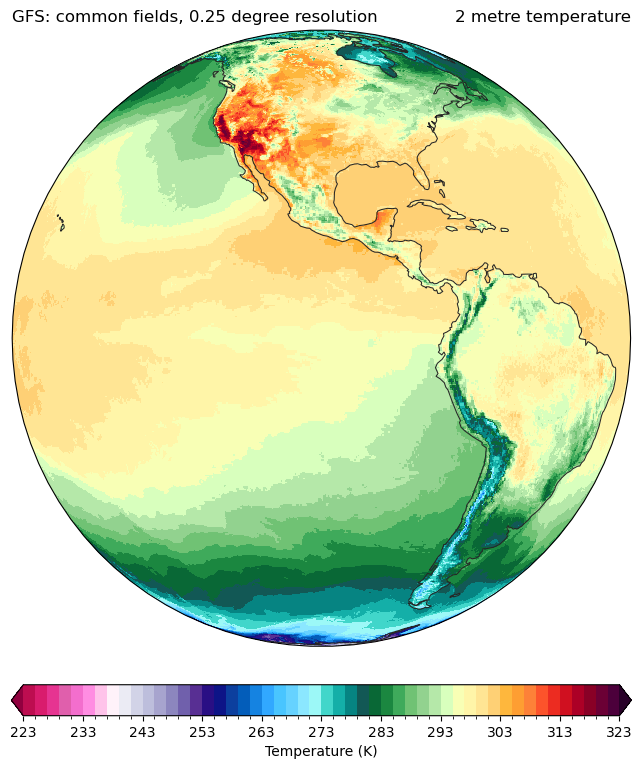

In [7]:
ax = EasyMap(crs=ccrs.Geostationary(central_longitude=-100), figsize=[10, 10]).ax

p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    shrink=0.8,
    **cm_tmp(units="K").cbar_kwargs,
)

ax.set_title(ds.t2m.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")

## MetPy Parsing
We can also use metpy to parse the GFS grid_mapping. This works because Herbie attempts to parse the grid_mapping from the cfgrib GRIB info.

c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


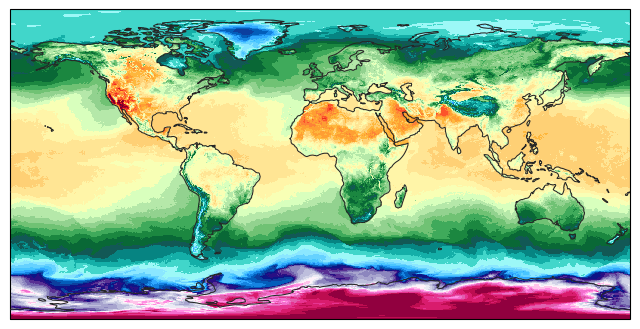

In [8]:
crs = ds.metpy.parse_cf().metpy_crs.item().to_cartopy()
ax = EasyMap(crs=crs, figsize=[8, 8]).ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m,
    transform=pc,
    **cm_tmp(units="K").cmap_kwargs,
)

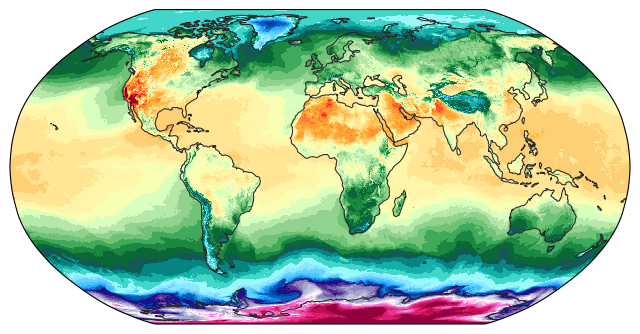

In [9]:
ax = EasyMap(crs=ccrs.Robinson(), figsize=[8, 8]).ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.t2m, transform=pc, **cm_tmp(units="K").cmap_kwargs
)

## GFS wave data
This demonstrates getting data from the GFS wave output.

In [10]:
H = Herbie("2021-07-11", model="gfs_wave")

✅ Found ┊ model=gfs_wave ┊ product=arctic.9km ┊ 2021-Jul-11 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [11]:
H.read_idx()

grib_message  start_byte end_byte            range reference_time  \
0              1           0   430316         0-430316     2021-07-11   
1              2      430316  1049180   430316-1049180     2021-07-11   
2              3     1049180  1480559  1049180-1480559     2021-07-11   
3              4     1480559  1908977  1480559-1908977     2021-07-11   
4              5     1908977  2174766  1908977-2174766     2021-07-11   
5              6     2174766  2497196  2174766-2497196     2021-07-11   
6              7     2497196  3016885  2497196-3016885     2021-07-11   
7              8     3016885  3260189  3016885-3260189     2021-07-11   
8              9     3260189  3529930  3260189-3529930     2021-07-11   
9             10     3529930  3764423  3529930-3764423     2021-07-11   
10            11     3764423  3968459  3764423-3968459     2021-07-11   
11            12     3968459  4247106  3968459-4247106     2021-07-11   
12            13     4247106  4558849  4247106-4558849     2021-07-11   
13            14     4558849  4873390  4558849-4873390     2021-07-11   
14            15     4873390  5158237  4873390-5158237     2021-07-11   
15            16     5158237  5558669  5158237-5558669     2021-07-11   
16            17     5558669  6033915  5558669-6033915     2021-07-11   
17            18     6033915  6470116  6033915-6470116     2021-07-11   
18            19     6470116                  6470116-     2021-07-11   

   valid_time variable          level forecast_time               search_this  
0  2021-07-11     WIND        surface           anl         :WIND:surface:anl  
1  2021-07-11     WDIR        surface           anl         :WDIR:surface:anl  
2  2021-07-11     UGRD        surface           anl         :UGRD:surface:anl  
3  2021-07-11     VGRD        surface           anl         :VGRD:surface:anl  
4  2021-07-11    HTSGW        surface           anl        :HTSGW:surface:anl  
5  2021-07-11    PERPW        surface           anl        :PERPW:surface:anl  
6  2021-07-11    DIRPW        surface           anl        :DIRPW:surface:anl  
7  2021-07-11    WVHGT        surface           anl        :WVHGT:surface:anl  
8  2021-07-11    SWELL  1 in sequence           anl  :SWELL:1 in sequence:anl  
9  2021-07-11    SWELL  2 in sequence           anl  :SWELL:2 in sequence:anl  
10 2021-07-11    SWELL  3 in sequence           anl  :SWELL:3 in sequence:anl  
11 2021-07-11    WVPER        surface           anl        :WVPER:surface:anl  
12 2021-07-11    SWPER  1 in sequence           anl  :SWPER:1 in sequence:anl  
13 2021-07-11    SWPER  2 in sequence           anl  :SWPER:2 in sequence:anl  
14 2021-07-11    SWPER  3 in sequence           anl  :SWPER:3 in sequence:anl  
15 2021-07-11    WVDIR        surface           anl        :WVDIR:surface:anl  
16 2021-07-11    SWDIR  1 in sequence           anl  :SWDIR:1 in sequence:anl  
17 2021-07-11    SWDIR  2 in sequence           anl  :SWDIR:2 in sequence:anl  
18 2021-07-11    SWDIR  3 in sequence           anl  :SWDIR:3 in sequence:anl

In [12]:
ds = H.xarray("SWELL:1 in sequence", remove_grib=False)
ds

GeocalculusError: Problem with calculation of geographic attributes

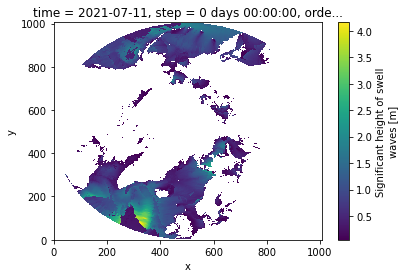

In [ ]:
ds.swell.plot()

In [ ]:
ds.herbie.crs

NameError: name 'x' is not defined